In [1]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#Load Data
df = pd.read_csv('tugassesi11_ml.csv')
df.head()

,Kuis,Tugas,UTS,UAS,Target,RATA_RATA
0,83,95,89,38,0,76
1,74,34,49,87,0,61
2,90,90,59,39,0,70
3,52,98,43,31,1,56
4,55,47,59,58,1,55


In [3]:
#Identifikasi data
df.info() #Memeriksa Tipe Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Kuis       40 non-null     int64
 1   Tugas      40 non-null     int64
 2   UTS        40 non-null     int64
 3   UAS        40 non-null     int64
 4   Target     40 non-null     int64
 5   RATA_RATA  40 non-null     int64
dtypes: int64(6)
memory usage: 2.0 KB


In [4]:
# Menghitung persentase duplikasi
percentage_duplicates = (df.duplicated().sum() / df.shape[0]) * 100

print("Jumlah duplikasi : ", df.duplicated().sum()) #Melihat Jumlah Duplikasi Data
print(f"Persentase duplikasi: {percentage_duplicates:.2f}%")

Jumlah duplikasi :  0
Persentase duplikasi: 0.00%


In [5]:
df.describe() #Memeriksa Parameter Statistik

,Kuis,Tugas,UTS,UAS,Target,RATA_RATA
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,54.875000,56.050000,55.200000,60.475000,0.550000,56.775000
std,24.362842,27.550373,28.129918,25.802989,0.503831,12.296523
min,11.000000,13.000000,10.000000,12.000000,0.000000,28.000000
25%,34.500000,29.500000,29.750000,39.750000,0.000000,49.000000
50%,55.000000,56.000000,59.500000,63.000000,1.000000,58.500000
75%,70.250000,86.250000,79.750000,83.250000,1.000000,68.000000
max,97.000000,98.000000,95.000000,99.000000,1.000000,77.000000


In [6]:
#cleaning data
df.drop_duplicates(inplace=True) #Menghapus Data Duplikat

In [7]:
print("Jumlah Duplikasi : ", df.duplicated().sum()) #Melihat Jumlah Duplikasi Data

Jumlah Duplikasi :  0


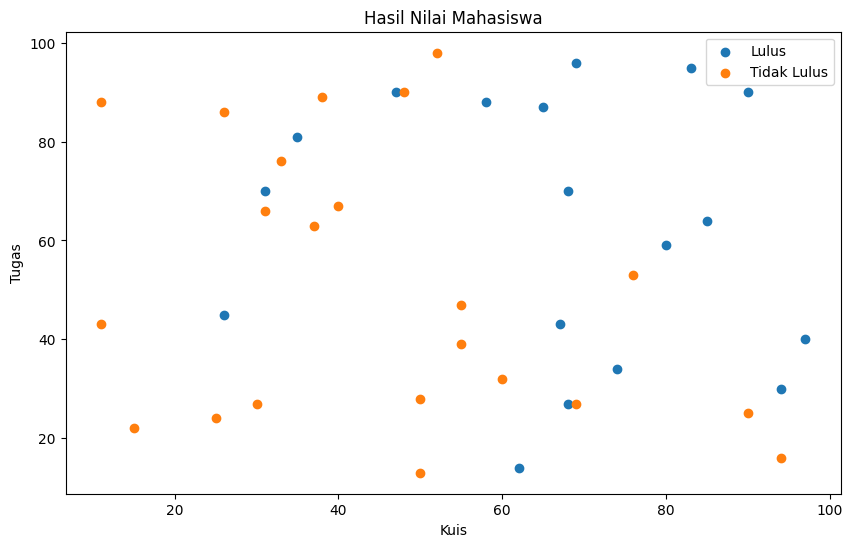

In [8]:
plt.figure(figsize=(10,6))

#Target = 0 (Lulus)
plt.scatter(x = df[df['Target']==0]['Kuis'], y = df.Tugas[df.Target==0])
#Target = 1 (Tidak Lulus)
plt.scatter(x = df[df['Target']==1]['Kuis'], y = df.Tugas[df.Target==1],);

plt.title("Hasil Nilai Mahasiswa")
plt.xlabel("Kuis")
plt.ylabel("Tugas")
plt.legend(["Lulus", "Tidak Lulus"])

Text(0, 0.5, 'Tugas (mm Hg)')

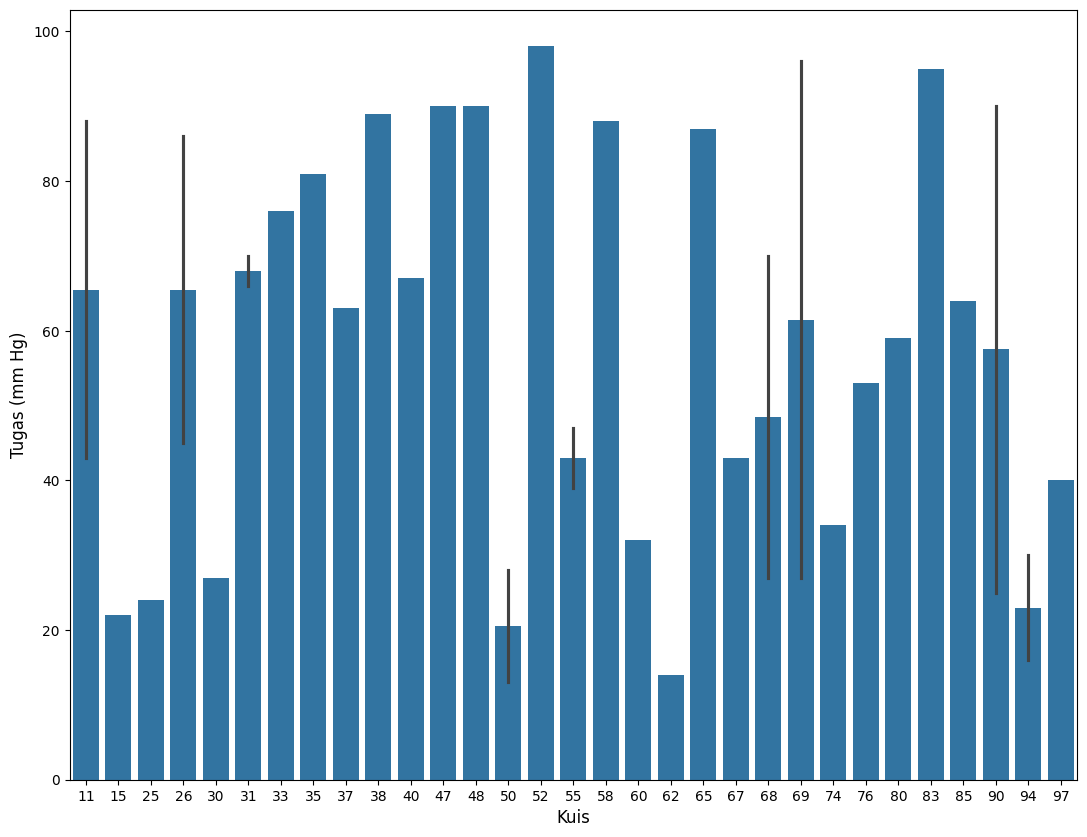

In [9]:
plt.figure(figsize=(13,10))
sns.barplot(x=df["Kuis"],y=df["Tugas"])
plt.xlabel('Kuis',fontsize=12)
plt.ylabel('Tugas (mm Hg)',fontsize=12)

In [10]:
# #Feature Engineering
# #Mengganti Kolom Sex
# df["sex"].replace({"Male" : 1,
#                    "Female" : 0}, inplace=True)
# #Mengganti Kolom Chest Pain
# df["chest_pain_type"].replace({"Typical angina" : 1,
#                                   "Atypical angina" : 2,
#                                   "Non-anginal pain" : 3,
#                                   "Asymptomatic" : 4}, inplace=True)
# #Mengganti Kolom Fasting Blood Sugar
# df["fasting_blood_sugar"].replace({"Greater than 120 mg/ml" : 1,
#                                    "Lower than 120 mg/ml" : 0}, inplace=True)
# #Mengganti Kolom Resting Electrocardiographic
# df["rest_ecg"].replace({"Normal" : 0,
#                        "ST-T wave abnormality" : 1,
#                        "Left ventricular hypertrophy" : 2}, inplace=True)
# #Mengganti Kolom Exercise Induced Angina
# df["exercise_induced_angina"].replace({"Yes" : 1,
#                                        "No" : 0}, inplace=True)
# #Mengganti Kolom Slope
# df["slope"].replace({"Upsloping" : 1,
#                      "Flat" : 2,
#                      "Downsloping" : 3}, inplace=True)
# #Mengganti Vessels Colored By Flourosopy
# df["vessels_colored_by_flourosopy"].replace({"Zero" : 0,
#                                              "One" : 1,
#                                              "Two" : 2,
#                                              "Three" : 3,
#                                              "Four" : 4}, inplace=True)
# #Mengganti Kolom
# df["thalassemia"].replace({"Normal" : 3,
#                         "Fixed Defect" : 6,
#                         "Reversable Defect" : 7,
#                           "No" : 0}, inplace=True)

df['Target'].replace({
    "Lulus":0,
    "Tidak Lulus":1,
}, inplace=True)
df.head()

,Kuis,Tugas,UTS,UAS,Target,RATA_RATA
0,83,95,89,38,0,76
1,74,34,49,87,0,61
2,90,90,59,39,0,70
3,52,98,43,31,1,56
4,55,47,59,58,1,55


In [11]:
#Persiapan data menjadi model
sc=StandardScaler()
X=df.drop('Target',axis=1)
Y=df['Target']
df=sc.fit(X).transform(X)

In [12]:
#Pisahkan data train dan test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=3)


In [13]:
#Menyusun model, evaluasi dan klasifikasi
def model(X_train,y_train):
    models=[]
   #Random Forest Classifier
    rfc=RandomForestClassifier()
    rfc.fit(X_train,y_train)
    models.append(rfc)
    #XGBoost
    xgb=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1)
    xgb.fit(X_train,y_train)
    models.append(xgb)



In [14]:
models=model(X_train,y_train) #Penampung Nilai X Train dan y Train

In [15]:
Model=['RandomForestClassifier','XgBoost']

In [16]:
# Inisialisasi model-modelnya
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Fit model ke data latih
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Simpan model dalam sebuah list
models = [rf, gb]

# Menghitung Akurasi
train_accuracy=[]
test_accuracy=[]
for i in range(len(models)):
    yhat = models[i].predict(X_test)
    yhat_t = models[i].predict(X_train)
    train_accuracy.append(accuracy_score(yhat_t, y_train))
    test_accuracy.append(accuracy_score(yhat, y_test))

In [17]:
Accuracy_score=pd.DataFrame({
    'Model':Model,
    'Train_Accuracy':train_accuracy,
    'Test_Accuracy':test_accuracy
})

In [18]:
Accuracy_score #Melihat Skor Akurasi

,Model,Train_Accuracy,Test_Accuracy
0,RandomForestClassifier,1.0,1.0
1,XgBoost,1.0,1.0


In [19]:
score=dict(zip(Model, Accuracy_score['Test_Accuracy'].values)) #Membuat Dictionary Dari Hasil Akurasi
score={k: v for k, v in sorted(score.items(), key=lambda item: item[1])} #Mengurutkan Dictionary Berdasarkan Nilai Akurasi

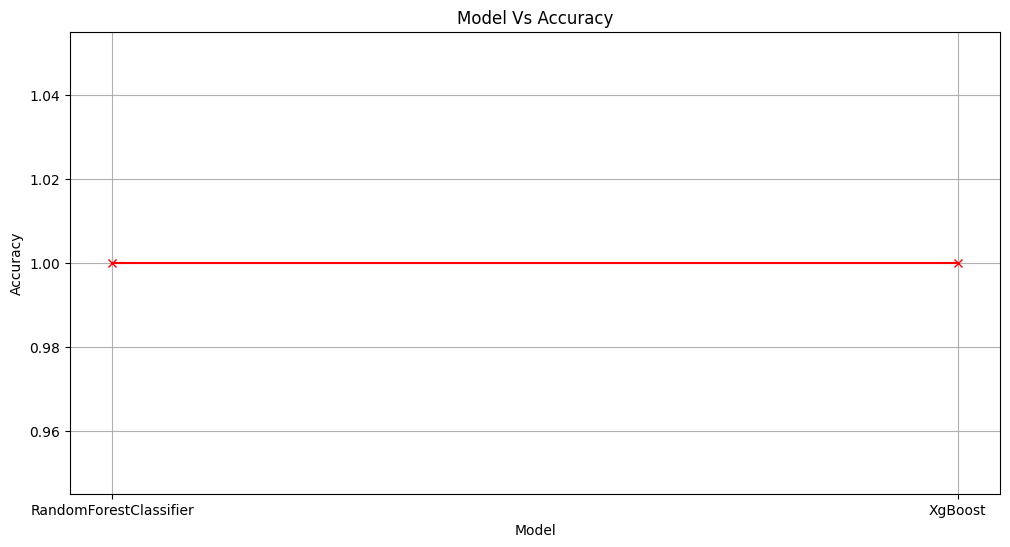

In [20]:
#Membuat Grafik Perbandingan Model dan Akurasi
plt.figure(figsize=(12,6))
plt.plot(list(score.keys()),list(score.values()),marker='x',color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Vs Accuracy')
plt.grid()

In [21]:
#Model Terbaik
best_model = Accuracy_score.loc[Accuracy_score['Test_Accuracy'].idxmax()]
print("Model terbaik berdasarkan akurasi pada data uji:")
print(best_model)

Model terbaik berdasarkan akurasi pada data uji:
Model             RandomForestClassifier
Train_Accuracy                       1.0
Test_Accuracy                        1.0
Name: 0, dtype: object


In [22]:
# Ambil model dengan akurasi tertinggi dari Accuracy_score
best_model_name = Accuracy_score.loc[Accuracy_score['Test_Accuracy'].idxmax()]['Model']
best_model_index = Model.index(best_model_name)
best_model = models[best_model_index]

# Lakukan prediksi pada data uji
y_pred = best_model.predict(X_test)

#Model Evaluation
print(accuracy_score(y_test,y_pred))

1.0


In [23]:
# Prediksi pada data baru (contoh: data test)
# Misalnya, kita akan menggunakan satu baris dari data uji sebagai contoh
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = gb.predict(sample_data)
print("Prediction:", prediction)

Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [24]:
# Evaluasi model dengan mencetak laporan klasifikasi
print("Laporan Klasifikasi untuk Model Terbaik:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi untuk Model Terbaik:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



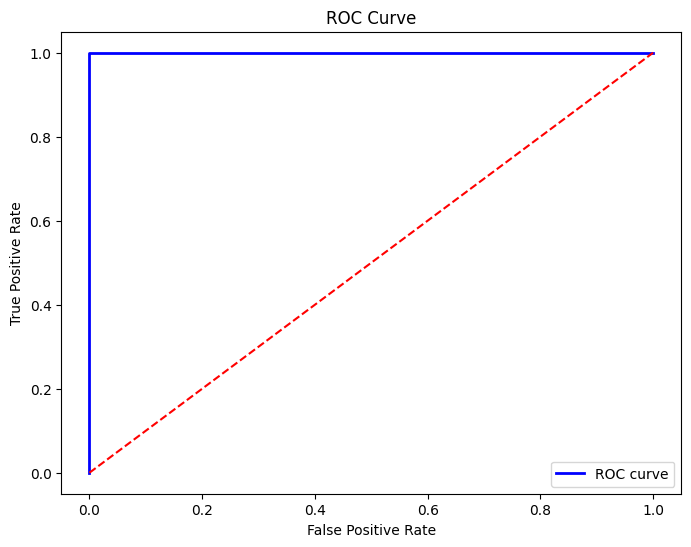

Area under the ROC curve (AUC): 1.00


In [25]:
# Mendapatkan nilai keputusan dari model terbaik
y_scores = best_model.predict_proba(X_test)[:, 1]

# Menghitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Hitung Area di Bawah Kurva ROC (AUC)
auc = roc_auc_score(y_test, y_scores)
print(f"Area under the ROC curve (AUC): {auc:.2f}")